# Miniproject 1: Image Classification

## Introduction

### Important dates:

- Project release: Friday, 15th March 2019
- **Submission deadline**: Monday, 29th April 2019, 11:59 pm

### Description

One of the deepest traditions in learning about deep learning is to first [tackle the exciting problem of MNIST classification](http://yann.lecun.com/exdb/mnist/). [The MNIST database](https://en.wikipedia.org/wiki/MNIST_database) (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used as a first test for new classification algorithms. 
We follow this tradition to investigate the performance of artificial neural networks of different complexity on MNIST. However, since MNIST is too easy for accessing the full power of modern machine learning algorithms (see e.g. [this post](https://twitter.com/goodfellow_ian/status/852591106655043584)) we will extend our analysis to the recently introduced, harder [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist).


### Prerequisites

- You should have a running installation of [tensorflow](https://www.tensorflow.org/install/) and [keras](https://keras.io/). Feel free to gain inspiration from the [Keras example directory](https://github.com/keras-team/keras/tree/master/examples) for your implementations.
- You should know the concepts "multilayer perceptron", "stochastic gradient descent with minibatches", "convolutional neural network", "training and validation data", "overfitting" and "early stopping".

### What you will learn

- You will learn how to define feedforward neural networks in keras and fit them to data.
- You will be guided through a prototyping procedure for the application of deep learning to a specific domain.
- You will get in contact with concepts discussed later in the lecture, like "regularization", "batch normalization" and "convolutional networks".
- You will gain some experience on the influence of network architecture, optimizer and regularization choices on the goodness of fit.
- You will learn to be more patient :) Some fits may take your computer quite a bit of time; run them over night (or on an external server).

### Evaluation criteria

The evaluation is (mostly) based on the figures you submit and your answer sentences. Provide clear and concise answers respecting the indicated maximum length (answers to the questions should be below the line that says "Answer to question ...").

**The submitted notebook must be run by you!** We will only do random tests of your code and not re-run the full notebook. There will be fraud detection sessions at the end of the semester.

### Your names

**Before you start**: please enter your full name(s) in the field below.

In [1]:
student1 = "Marshall Cooper"
student2 = "Andrea Piccione"

## Some helper functions

For your convenience we provide here some functions to preprocess the data and plot the results later. Simply run the following cells with `Shift-Enter`.

### Dependencies and constants

In [2]:
%matplotlib inline

import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.io

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


### Plotting

In [3]:
def plot_some_samples(x, y = [], yhat = [], select_from = [], 
                      ncols = 6, nrows = 4, xdim = 28, ydim = 28,
                      label_mapping = range(10)):
    """plot some input vectors as grayscale images (optionally together with their assigned or predicted labels).
    
    x is an NxD - dimensional array, where D is the length of an input vector and N is the number of samples.
    Out of the N samples, ncols x nrows indices are randomly selected from the list select_from (if it is empty, select_from becomes range(N)).
    
    Keyword arguments:
    y             -- corresponding labels to plot in green below each image.
    yhat          -- corresponding predicted labels to plot in red below each image.
    select_from   -- list of indices from which to select the images.
    ncols, nrows  -- number of columns and rows to plot.
    xdim, ydim    -- number of pixels of the images in x- and y-direction.
    label_mapping -- map labels to digits.
    
    """
    fig, ax = plt.subplots(nrows, ncols)
    if len(select_from) == 0:
        select_from = range(x.shape[0])
    indices = np.random.choice(select_from, size = min(ncols * nrows, len(select_from)), replace = False)
    for i, ind in enumerate(indices):
        thisax = ax[i//ncols,i%ncols]
        thisax.matshow(x[ind].reshape(xdim, ydim), cmap='gray')
        thisax.set_axis_off()
        if len(y) != 0:
            j = y[ind] if type(y[ind]) != np.ndarray else y[ind].argmax()
            thisax.text(0, 0, (label_mapping[j])%10, color='green', 
                                                       verticalalignment='top',
                                                       transform=thisax.transAxes)
        if len(yhat) != 0:
            k = yhat[ind] if type(yhat[ind]) != np.ndarray else yhat[ind].argmax()
            thisax.text(1, 0, (label_mapping[k])%10, color='red',
                                             verticalalignment='top',
                                             horizontalalignment='right',
                                             transform=thisax.transAxes)
    return fig

def prepare_standardplot(title, xlabel):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)
    ax1.set_ylabel('categorical cross entropy')
    ax1.set_xlabel(xlabel)
    ax1.set_yscale('log')
    ax2.set_ylabel('accuracy [% correct]')
    ax2.set_xlabel(xlabel)
    return fig, ax1, ax2

def finalize_standardplot(fig, ax1, ax2):
    ax1handles, ax1labels = ax1.get_legend_handles_labels()
    if len(ax1labels) > 0:
        ax1.legend(ax1handles, ax1labels)
    ax2handles, ax2labels = ax2.get_legend_handles_labels()
    if len(ax2labels) > 0:
        ax2.legend(ax2handles, ax2labels)
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)

def plot_history(history, title):
    fig, ax1, ax2 = prepare_standardplot(title, 'epoch')
    ax1.plot(history.history['loss'], label = "training")
    ax1.plot(history.history['val_loss'], label = "validation")
    ax2.plot(history.history['acc'], label = "training")
    ax2.plot(history.history['val_acc'], label = "validation")
    finalize_standardplot(fig, ax1, ax2)
    return fig


## Exercise 1: Data import and visualization (4 points)

### Description

### Loading the data

The datasets we use in this project (MNIST, Fashion-MNIST) consists of grayscale images with 28x28 pixels. Keras comes with a convenient in-built [data importer](https://keras.io/datasets/) for common datasets.

1. As a warm-up exercise, use this importer to (down-)load the MNIST and Fashion-MNIST dataset. Assign useful variables to test & train images and labels for both datasets respectively. (2 pts)
2. Use the corresponding plotting function defined above to plot some samples of the two datasets. What do the green digits at the bottom left of each image indicate? (1 sentence max.) (2 pts)

The low resolution (and grayscale) of the images certainly misses some information that could be helpful for classifying the images. However, since the data has lower dimensionality due to the low resolution, the fitting procedures converge faster. This is an advantage in situations like here (or generally when prototyping), were we want to try many different things without having to wait too long for computations to finish.



### Solution

In [4]:
from keras.datasets import mnist, fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_fashion_train, y_fashion_train), (x_fashion_test, y_fashion_test) = fashion_mnist.load_data()

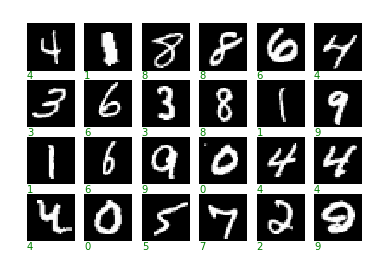

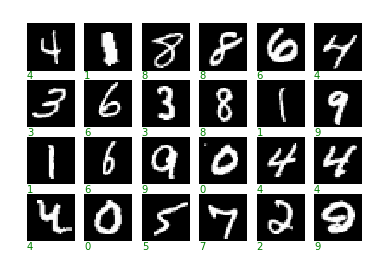

In [5]:
plot_some_samples(x_train, y_train)

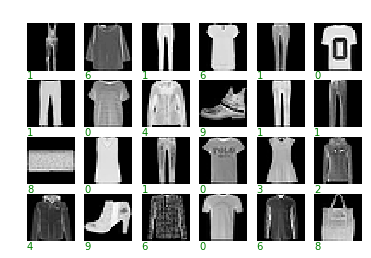

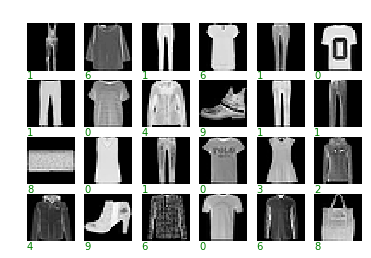

In [6]:
plot_some_samples(x_fashion_train, y_fashion_train)

Answer to question 2:

The green digits at the bottom of each image indicate the class label the image belongs to.

**Data pre-processing**: To prepare for fitting we transform the labels to one hot coding, i.e. for 5 classes, label 2 becomes the vector [0, 0, 1, 0, 0] (python uses 0-indexing). Furthermore we reshape (flatten) the input images to input vectors and rescale the data into the range [0,1].

In [7]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

y_fashion_train = keras.utils.to_categorical(y_fashion_train)
y_fashion_test = keras.utils.to_categorical(y_fashion_test)

In [8]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])/np.max(x_train)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/np.max(x_test)

x_fashion_train = x_fashion_train.reshape(x_fashion_train.shape[0], x_fashion_train.shape[1]*x_fashion_train.shape[2])/np.max(x_fashion_train)
x_fashion_test = x_fashion_test.reshape(x_fashion_test.shape[0], x_fashion_test.shape[1]*x_fashion_test.shape[2])/np.max(x_fashion_test)

## Exercise 2: No hidden layer (10 points)

### Description

Define and fit a model without a hidden layer (since we will use multi-layer models later in this project, you can define a general constructor function for models with an arbitrary number of hidden layers already at this point). (1 pt for each step)

1. Use the softmax activation for the output layer.
2. Use the categorical_crossentropy loss.
3. Add the accuracy metric to the metrics.
4. Choose stochastic gradient descent for the optimizer.
5. Choose a minibatch size of 128.
6. Fit for as many epochs as needed to see no further decrease in the validation loss.
7. Plot the output of the fitting procedure (a history object) using the function plot_history defined above.
8. Determine the indices of all test images that are misclassified by the fitted model and plot some of them using the function 
   `plot_some_samples(x_test, y_test, yhat_test, error_indices)`. Explain the green and red digits at the bottom of each image.
9. Repeat the above steps for fitting the network to the Fashion-MNIST dataset.


Hints:
* Read the keras docs, in particular [Getting started with the Keras Sequential model](https://keras.io/getting-started/sequential-model-guide/).
* Have a look at the keras [examples](https://github.com/keras-team/keras/tree/master/examples), e.g. [mnist_mlp](https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py).

### Solution

#### MNIST

In [15]:
# Model without hidden layers definition and compilaition, according to specs

model_mnist_0hl = Sequential()
model_mnist_0hl.add(Dense(y_train.shape[1], input_shape=x_train.shape[1:], activation='softmax'))
model_mnist_0hl.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model_mnist_0hl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Fitting the model

history_mnist_0hl = model_mnist_0hl.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test), verbose=0)

10000/10000 [==============================] - 0s 12us/step
Validation loss =  0.27302509772479533
Validation accuracy =  0.9232


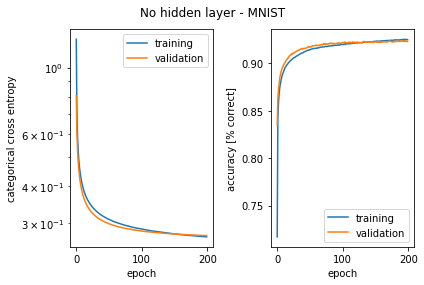

In [76]:
# Plotting accuracy and loss of the model for training and validation data, depending on the epoch 
plot_history(history_mnist_0hl, "No hidden layer - MNIST")

score = model_mnist_0hl.evaluate(x_test, y_test)
print("Validation loss = ", score[0])
print("Validation accuracy = ", score[1])

In [19]:
# Getting predicted labels on test data

pred_classes_mnist_0hl = model_mnist_0hl.predict_classes(x_test)
pred_classes_mnist_0hl

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
# Getting target labels

test_labels_mnist_h0l = np.nonzero(y_test)[1]
test_labels_mnist_h0l

array([7, 2, 1, ..., 4, 5, 6])

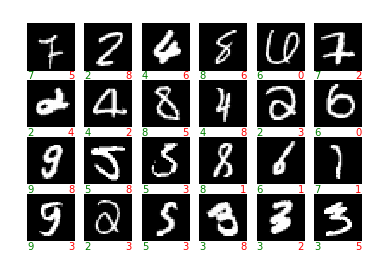

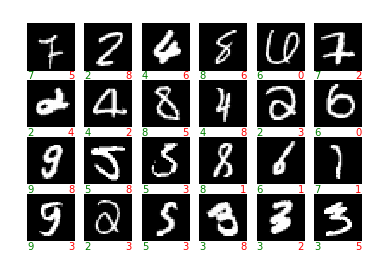

In [21]:
# Computing error_indices
error_indices_mnist_0hl = np.nonzero(pred_classes_mnist_0hl != test_labels_mnist_h0l)[0]

# Plotting some misclassified images 
plot_some_samples(x_test, y_test, pred_classes_mnist_0hl, error_indices_mnist_0hl)

#### FASHION MNIST

In [53]:
# Model without hidden layers definition and compilaition, according to specs

model_fashion_0hl = Sequential()
model_fashion_0hl.add(Dense(y_fashion_train.shape[1], input_shape=x_fashion_train.shape[1:], activation='softmax'))
model_fashion_0hl.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
model_fashion_0hl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Model fitting
history_fashion_0hl = model_fashion_0hl.fit(x_fashion_train, y_fashion_train, epochs=200, batch_size=128, validation_data=(x_fashion_test, y_fashion_test), verbose=0)

10000/10000 [==============================] - 0s 12us/step
Validation loss =  0.4435795616626739
Validation accuracy =  0.8437


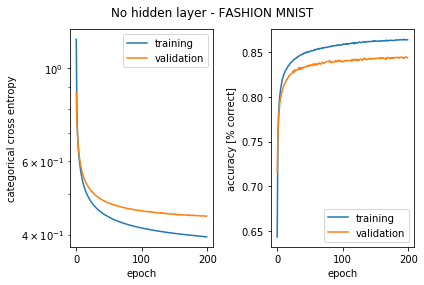

In [75]:
# Plotting accuracy and loss of the model for training and validation data, depending on the epoch 
plot_history(history_fashion_0hl, "No hidden layer - FASHION MNIST")

score = model_fashion_0hl.evaluate(x_fashion_test, y_fashion_test)
print("Validation loss = ", score[0])
print("Validation accuracy = ", score[1])

In [56]:
# Classes predicted
pred_classes_fashion_0hl = model_fashion_0hl.predict_classes(x_fashion_test)
pred_classes_fashion_0hl

array([9, 2, 1, ..., 8, 1, 5])

In [57]:
# Target labels
test_labels_fashion_0hl = np.nonzero(y_fashion_test)[1]
test_labels_fashion_0hl

array([9, 2, 1, ..., 8, 1, 5])

In [58]:
# Computing error indices (indices of misclassified images)
error_indices_fashion_0hl = np.nonzero(pred_classes_fashion_0hl != test_labels_fashion_0hl)[0]

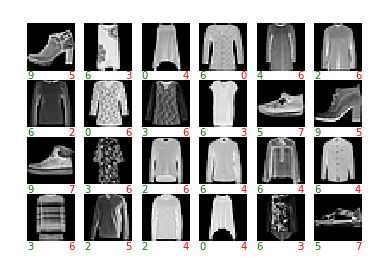

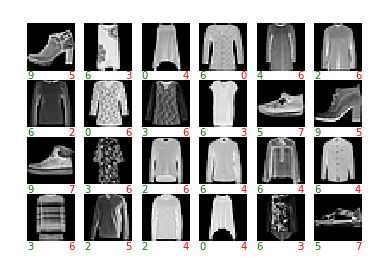

In [59]:
# Plotting some misclassified images
plot_some_samples(x_fashion_test, y_fashion_test, pred_classes_fashion_0hl, error_indices_fashion_0hl)

Answer to question 8:

The green digit indicates once again the class label of the image, instead the red digit indicates the label predicted by the model. Since we are displaying the images that were misclassified, we get different red and green digits and we can empirically observe why the model miscalssified an image.

## Exercise 3: One hidden layer, different optizimizers & overfitting (10 points)

### Description

Train a network with one hidden layer and compare different optimizers.

1. Use one hidden layer with 128 units and the 'relu' activation. Use the [summary method](https://keras.io/models/about-keras-models/) to display your model in a compact way. (1 pt)
2. Fit the model for 50 epochs with different learning rates of stochastic gradient descent (SGD). (1pt)
3. Replace the stochastic gradient descent optimizer with the [Adam optimizer](https://keras.io/optimizers/#adam). (1pt)
4. Plot the learning curves of SGD with a reasonable learning rate (i.e. in the range [0.01,0.1]) together with the learning curves of Adam in the same figure. Take care of a reasonable labeling of the curves in the plot. (2pts)
5. Answer the questions below. (4pts)
6. Run the network (using the Adam optimizer) on the Fashion-MNIST dataset and plot the learning curves using the plot_history function defined above. (1pt)

### Solution

#### MNIST

In [10]:
def mnist_1hl_lr_test(lr):
    print("Testing with learning rate = " + str(lr))
    
    # build model
    model_mnist_1hl = Sequential()
    model_mnist_1hl.add(Dense(128, input_shape=x_train.shape[1:], activation='relu'))
    model_mnist_1hl.add(Dense(y_train.shape[1], activation='softmax'))
    
    # summary information
    model_mnist_1hl.summary()
    
    # use specified learning rate
    sgd = SGD(lr=lr)
    model_mnist_1hl.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # fit model
    history_mnist_1hl = model_mnist_1hl.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), verbose=0)
    
    # analyze performance and plot history
    score = model_mnist_1hl.evaluate(x_test, y_test)
    print("Validation loss = ", score[0])
    print("Validation accuracy = ", score[1])
    plot_history(history_mnist_1hl, title = "MNIST - One hidden layer - SGD with learning rate = " + str(lr))
    return history_mnist_1hl

Testing with learning rate = 0.001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 26us/step
Validation loss =  0.3365752381324768
Validation accuracy =  0.9074
Testing with learning rate = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total

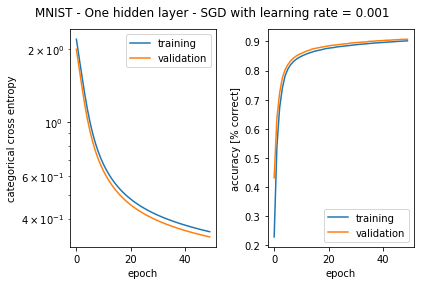

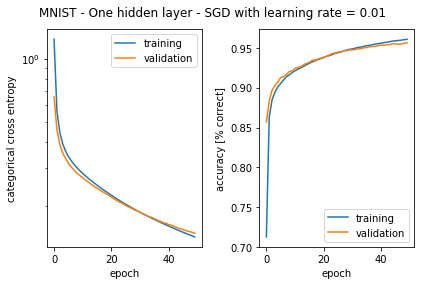

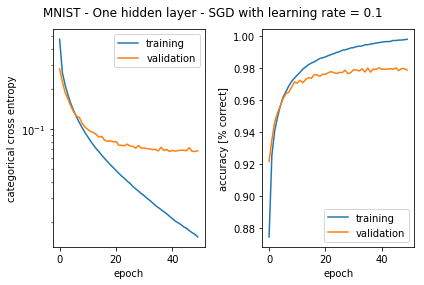

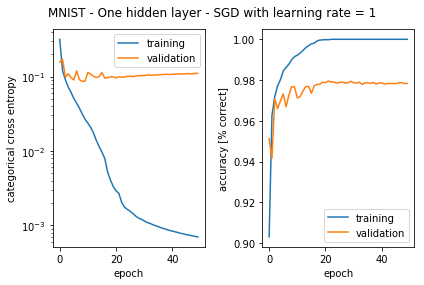

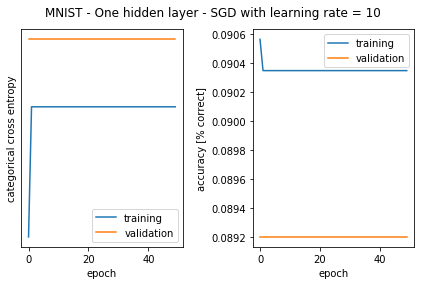

In [11]:
learning_rates = [0.001, 0.01, 0.1, 1, 10]
histories = []

# Test learning rates
for lr in learning_rates:
    histories.append(mnist_1hl_lr_test(lr))

In [78]:
# Model definition
model_mnist_1hl = Sequential()
model_mnist_1hl.add(Dense(128, input_shape=x_train.shape[1:], activation='relu'))
model_mnist_1hl.add(Dense(y_train.shape[1], activation='softmax'))

In [88]:
model_mnist_1hl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Model compilation with Adam optimizer
model_mnist_1hl.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
# Model fitting - Adam
history_mnist_1hl_adam = model_mnist_1hl.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), verbose=0)

10000/10000 [==============================] - 0s 21us/step
Validation loss =  0.09492391267776439
Validation accuracy =  0.9805


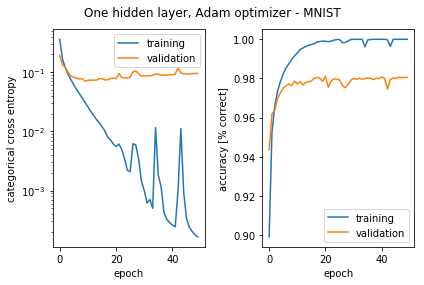

In [82]:
plot_history(history_mnist_1hl_adam, "One hidden layer, Adam optimizer - MNIST")

score = model_mnist_1hl.evaluate(x_test, y_test)
print("Validation loss = ", score[0])
print("Validation accuracy = ", score[1])

In [21]:
# This plotting routine might help you ...
def comparison_plot(history_sgd, history_adam, label1, label2, title):
    fig, ax1, ax2 = prepare_standardplot(title, "epochs")
    ax1.plot(history_sgd.history['loss'], label=label1 + ' training')
    ax1.plot(history_sgd.history['val_loss'], label=label1 + ' validation')
    ax1.plot(history_adam.history['loss'], label=label2 + ' training')
    ax1.plot(history_adam.history['val_loss'], label=label2 + ' validation')
    ax2.plot(history_sgd.history['acc'], label=label1 + ' training')
    ax2.plot(history_sgd.history['val_acc'], label=label1 + ' validation')
    ax2.plot(history_adam.history['acc'], label=label2 + ' training')
    ax2.plot(history_adam.history['val_acc'], label=label2 + ' validation')
    finalize_standardplot(fig, ax1, ax2)
    return fig

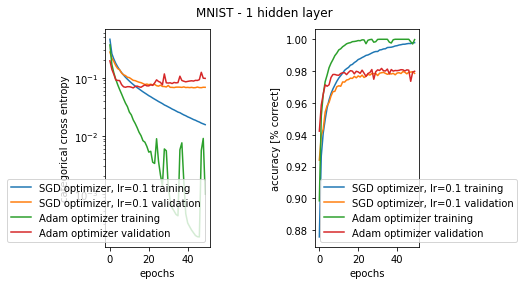

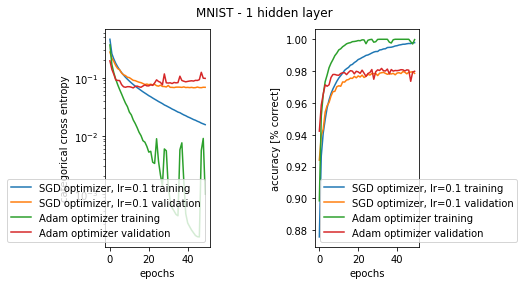

In [73]:
# Compare plots for the two different optimizers used
comparison_plot(histories[-1], history_mnist_1hl_adam, "SGD optimizer, lr=0.1", "Adam optimizer", "MNIST - 1 hidden layer")

**Question**: What happens if the learning rate of SGD is A) very large B) very small? Please answer A) and B) with one full sentence each (double click this markdown cell to edit).

**Answer**:

A) When the SGD learning rate is very large, the training is usually faster but this could lead the model to not converge to the optimal solution because weight updates are too large and gradient could even increase in that case.   

B) When the SGD learning rate is very small, the model could never converge and get to an optimal solution, so we could just have an underfitted model with poor performance.

**Question**: At which epoch (approximately) does the Adam optimizer start to overfit (on MNIST)? Please answer with one full sentence.

**Answer**:
It seems to start overfitting at the 10th epoch because the validation loss slowly increases from that point.

**Question**: Explain the qualitative difference between the loss curves and the accuracy curves with respect to signs of overfitting. Please answer with at most 3 full sentences.

**Answer**:
Overfitting happens when the model start to "fit" even the noise, not only the actual data: this usually leads to a model that can't generalize to other data apart from the training set, that's why we can be observe poor performance on the validation data. In fact, this happens when validation loss increases while at the same time training loss keeps decreasing. For accuracy, it usually corresponds to no further improvement (increase) of the metric on validation data (sometimes even worse).   

#### FASHION MNIST

In [84]:
# Model definition
model_fashion_1hl = Sequential()
model_fashion_1hl.add(Dense(128, input_shape=x_fashion_train.shape[1:], activation='relu'))
model_fashion_1hl.add(Dense(y_fashion_train.shape[1], activation='softmax'))

In [90]:
model_fashion_1hl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Model compilation with Adam optimizer
model_fashion_1hl.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
# Model fitting on Fashion MNIST data - Adam
history_fashion_1hl_adam = model_fashion_1hl.fit(x_fashion_train, y_fashion_train, epochs=50, batch_size=128, validation_data=(x_fashion_test, y_fashion_test), verbose=0)

10000/10000 [==============================] - 0s 21us/step
Validation loss =  0.4244870959818363
Validation accuracy =  0.889


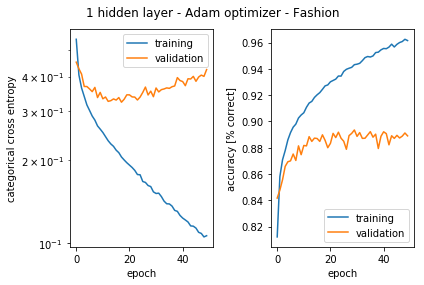

In [87]:
# Plotting history
plot_history(history_fashion_1hl_adam, "1 hidden layer - Adam optimizer - Fashion")

score = model_fashion_1hl.evaluate(x_fashion_test, y_fashion_test)
print("Validation loss = ", score[0])
print("Validation accuracy = ", score[1])

## Exercise 4: Model performance as a function of number of hidden neurons (8 points)

### Description

Investigate how the best validation loss and accuracy depends on the number of hidden neurons in a single layer.

1. Fit a reasonable number of models (e.g. 5) with different hidden layer sizes (between 10 and 1000 hidden neurons) to the MNIST dataset. You may use the Adam optimizer and a meaningful number of epochs (overfitting!). (3 pts)
2. Plot the best validation loss and accuracy versus the number of hidden neurons. Is the observed trend in accordance with the [general approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)? If not, what might be practical reasons for the deviation? (2 sentences max.) (3 pts)
3. Repeat steps 1. & 2. for the Fashion-MNIST dataset. (2 pts)

In this exercise we fit each model only for one initialization and random seed. In practice one would collect some statistics (e.g. 25-, 50-, 75-percentiles) for each layer size by fitting each model several times with different initializations and the random seeds. You may also want to do this here. It is a good exercise, but not mandatory as it takes quite a bit of computation time.

### Solution

In [112]:
# Helper function for the definition and compilation of a model with an arbitrary number of layers
def model_neurons_test(data, n_units):
    
    print("Testing with " + str(n_units) + " units")
    
    if data == "mnist":
        tempx_train = x_train
        tempy_train = y_train
        tempx_test = x_test
        tempy_test = y_test
    elif data == "fashion":
        tempx_train = x_fashion_train
        tempy_train = y_fashion_train
        tempx_test = x_fashion_test
        tempy_test = y_fashion_test
    else:
        return
    
    model = Sequential()
    
    # Adding as many units as specified by the paramter     
    model.add(Dense(n_units, input_shape=tempx_train.shape[1:], activation='relu'))
    
    # Adding output layer
    model.add(Dense(tempy_train.shape[1], activation='softmax'))
    
    model.summary()
    
    # Compilation with Adam optimizer
    model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Fitting model
    history = model.fit(tempx_train, tempy_train, epochs=200, batch_size=128, validation_data=(tempx_test, tempy_test), verbose=0)
    
    # analyze performance and plot history
    score = model.evaluate(tempx_test, tempy_test)
    print("Validation loss = ", score[0])
    print("Validation accuracy = ", score[1])
    
    plot_history(history, title = data + " - Adam optimizer - Units = " + str(n_units))
    
    return history

In [113]:
# Helper function to plot validation loss and accuracy versus number oh hidden layers
def plot_hisotry_per_neurons(configurations, losses, accuracies, title):
    fig, (ax1,ax2) = plt.subplots(1, 2)
    fig.suptitle(title)
    ax1.set_ylabel('validation loss')
    ax1.set_yscale("linear")
    ax1.set_xlabel("number of neurons")
    ax2.set_ylabel('validation accuracy')
    ax2.set_xlabel("number of neurons")
    ax1.plot(configurations, losses)
    ax2.plot(configurations, accuracies)
    return fig

#### MNIST

In [114]:
# Paramters
h_neurons = [100,250,500,750,1000]

Testing with 100 units
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_68 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 28us/step
Validation loss =  0.150365137571896
Validation accuracy =  0.979
Testing with 250 units
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_70 (Dense)             (None, 10)                2510      
Total params: 198,760
Trainable 

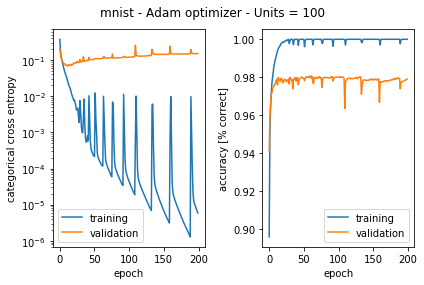

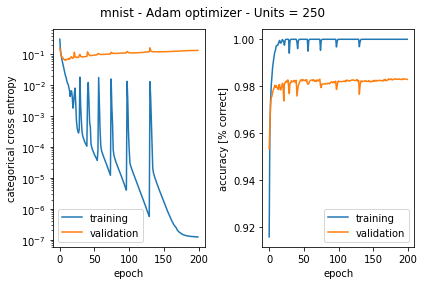

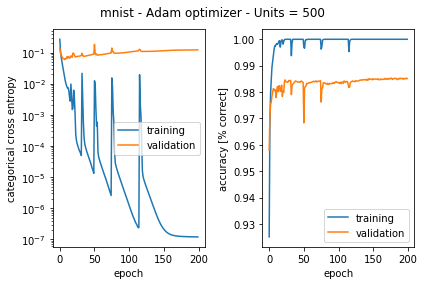

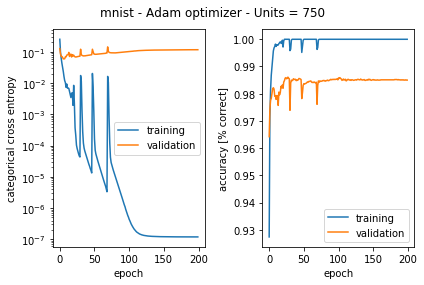

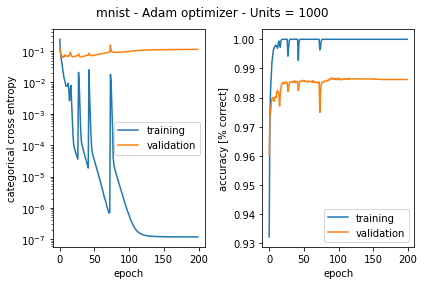

In [115]:
# Testing mnist

histories_mnist = []
# Creating and testing models
for n in h_neurons:
    histories_mnist.append(model_neurons_test("mnist", n))

In [116]:
# Data collected - MNIST

val_losses_mnist = []
val_accuracies_mnist = []

for i in histories_mnist:
    val_losses_mnist.append(min(i.history['val_loss']))
    val_accuracies_mnist.append(max(i.history['val_acc']))

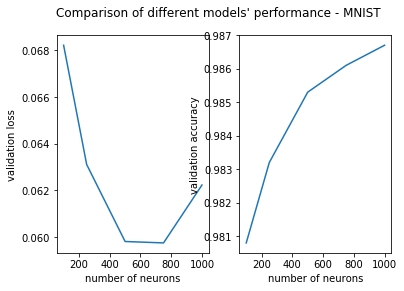

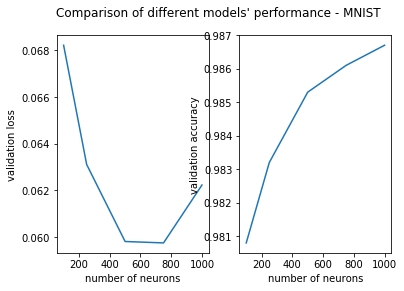

In [117]:
# Plot validation loss and accuracy versus number of hidden neurons - MNIST
plot_hisotry_per_neurons(h_neurons, val_losses_mnist, val_accuracies_mnist, "Comparison of different models' performance - MNIST")

#### FASHION MNIST

Testing with 100 units
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_78 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 30us/step
Validation loss =  0.8002315915971995
Validation accuracy =  0.88
Testing with 250 units
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_80 (Dense)             (None, 10)                2510      
Total params: 198,760
Trainable 

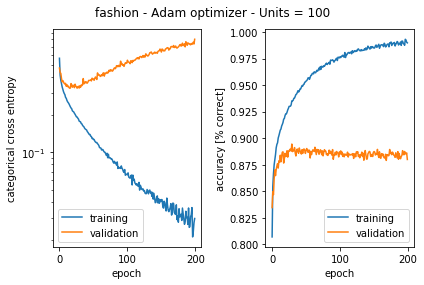

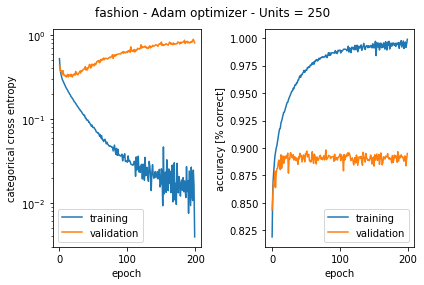

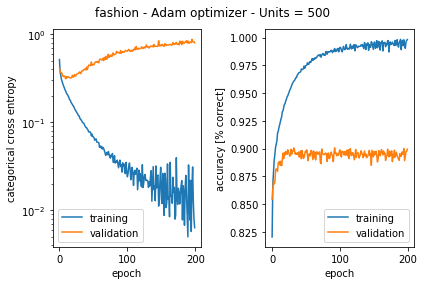

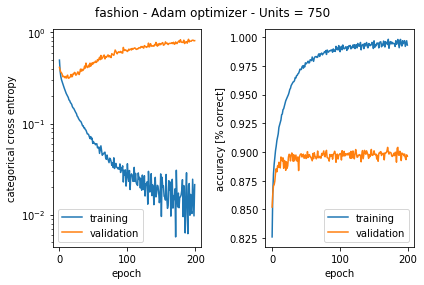

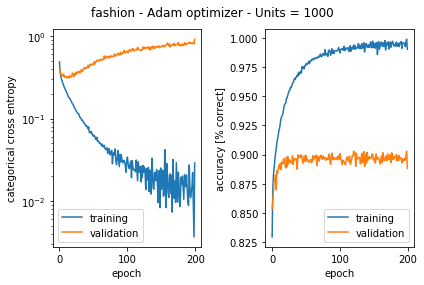

In [118]:
# Testing fashion mnist

histories_fashion = []
# Creating and testing models
for n in h_neurons:
    histories_fashion.append(model_neurons_test("fashion", n))

In [119]:
# Data collected - FASHION

val_losses_fashion = []
val_accuracies_fashion = []

for i in histories_fashion:
    val_losses_fashion.append(min(i.history['val_loss']))
    val_accuracies_fashion.append(max(i.history['val_acc']))

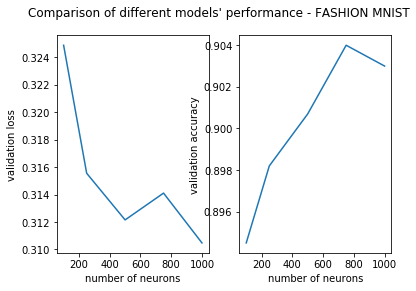

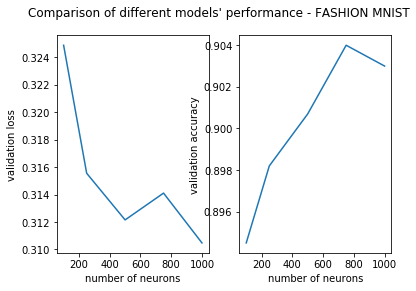

In [120]:
# Plot validation loss and accuracy versus number of hidden neurons - FASHION MNIST
plot_hisotry_per_neurons(h_neurons, val_losses_fashion, val_accuracies_fashion, "Comparison of different models' performance - FASHION MNIST")

Answer to question 2:

The trend seems to be mostly in accordance with the theorem because the performance are good in a specific range, up to the size of the input, and then seems to be less accurate and its approimation to be worse. 

## Exercise 5: Going deeper: tricks and regularization (8 points)

### Description

Adding hidden layers to a deep network does not necessarily lead to a straight-forward improvement of performance. Overfitting can be counteracted with regularization and dropout. Batch normalization is supposed to mainly speed up convergence. Since the MNIST dataset is almost perfectly solved already by a one-hidden-layer network we use the Fashion-MNIST dataset in this exercise.

1. Add one or two hidden layers with 50 hidden neurons (each) and train the network for a sufficiently long time (at least 100 epochs). Since deep models are very expressive you will most probably encounter overfitting. Try to improve the best validation scores of the model (even if it is only a minor improvement) by experimenting with batch_normalization layers, dropout layers and l1- and l2-regularization on weights (kernels) and biases. (4 pts)
2. After you have found good settings, plot the learning curves for both models, naive (=no tricks/regularization) and tuned (=tricks + regularized), preferably together in a comparison plot. Discuss your results; refer to the model performance with only 1 hidden layer. (2 sentences max.) (2pts)
3. Fit your best performing (probably regularized deep) model also to MNIST for having a reference for the next exercise. Plot the resulting learning curves. (2 pts)

### Solution

In [14]:
from keras import regularizers
from keras.layers.normalization import BatchNormalization

def regularized_model(data, title_model, layers_units, batch_norm = False, dropout = None, kernel_reg = None, bias_reg = None):
    
    print(title_model)
    
    if data == "mnist":
        tempx_train = x_train
        tempy_train = y_train
        tempx_test = x_test
        tempy_test = y_test
        
    elif data == "fashion":
        tempx_train = x_fashion_train
        tempy_train = y_fashion_train
        tempx_test = x_fashion_test
        tempy_test = y_fashion_test
    else:
        return
    
    
    model_reg = Sequential()
    
    for k in layers_units:
    
        # use regulaizers
        if kernel_reg is None and bias_reg is None:
            model_reg.add(Dense(k, input_shape=tempx_train.shape[1:], activation='relu'))
        elif kernel_reg is None and bias_reg is not None:
            model_reg.add(Dense(k, input_shape=tempx_train.shape[1:], activation='relu', bias_regularizer=bias_reg))
        elif kernel_reg is not None and bias_reg is None:
            model_reg.add(Dense(k, input_shape=tempx_train.shape[1:], activation='relu', kernel_regularizer=kernel_reg))
        else:
            model_reg.add(Dense(k, input_shape=tempx_train.shape[1:], activation='relu', kernel_regularizer=kernel_reg, bias_regularizer=bias_reg))
    
        # use batch normalization
        if batch_norm:
            model_reg.add(BatchNormalization())
    
        # use dropout
        if dropout is not None:
            model_reg.add(Dropout(dropout))
    
    # output layer
    model_reg.add(Dense(tempy_train.shape[1], activation='softmax'))

    # Model compilation with Adam optimizer
    model_reg.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])

    # summary
    model_reg.summary()
    
    # Model fitting
    history_reg = model_reg.fit(tempx_train, tempy_train, epochs=100, batch_size=128, validation_data=(tempx_test, tempy_test), verbose=0)

    plot_history(history_reg, title = title_model)

    # analyze performance and plot history
    score = model_reg.evaluate(tempx_test, tempy_test)
    print("Validation loss = ", score[0])
    print("Validation accuracy = ", score[1])

    return history_reg

Naive model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_16 (Dense)             (None, 50)                25050     
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                510       
Total params: 420,610
Trainable params: 420,610
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 46us/step
Validation loss =  0.7210497882643715
Validation accuracy =  0.8923


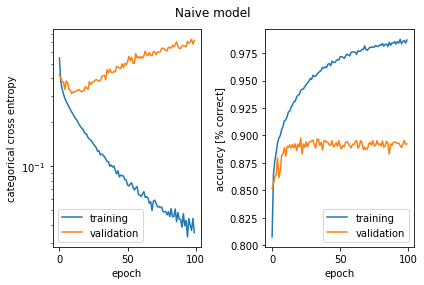

In [15]:
# Naive Model
history_naive = regularized_model("fashion", "Naive model", [500, 50, 50])

Model with batch normalization
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dense_20 (Dense)             (None, 50)                25050     
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
dense_21 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_3 (Batch (None, 50)                200       
_________________________________________________________________
dense_22 (Dense)             (None, 10)      

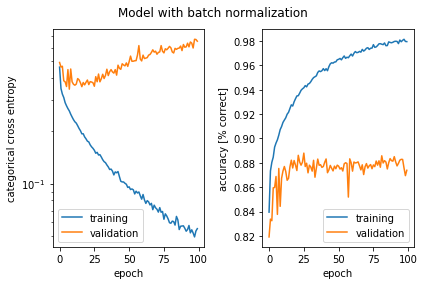

In [16]:
# Model with Batch normalization
regularized_model("fashion", "Model with batch normalization", [500, 50, 50], batch_norm=True)

Model with dropout = 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                25050     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)            

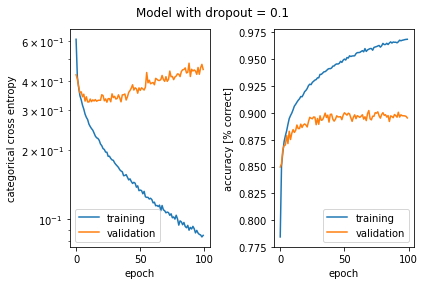

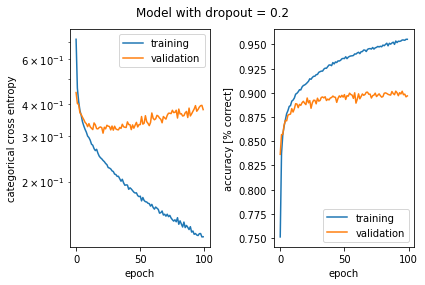

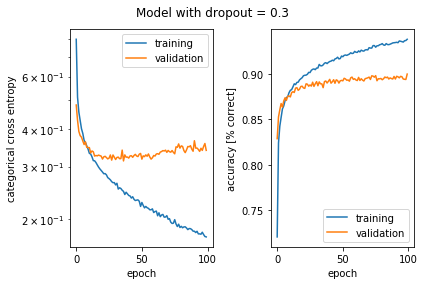

In [17]:
# Model with dropout
dropout_val = [0.1, 0.2, 0.3]

for i in dropout_val:
    regularized_model("fashion", "Model with dropout = " + str(i), [500, 50, 50], dropout=i)

Model with kernel l1 reg = 0.0001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_36 (Dense)             (None, 50)                25050     
_________________________________________________________________
dense_37 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                510       
Total params: 420,610
Trainable params: 420,610
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 1s 97us/step
Validation loss =  0.4690090391874313
Validation accuracy =  0.8773
Model with kernel l1 reg = 0.001
_________________________________________________________________
Layer (

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_68 (Dense)             (None, 50)                25050     
_________________________________________________________________
dense_69 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_70 (Dense)             (None, 10)                510       
Total params: 420,610
Trainable params: 420,610
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 1s 87us/step
Validation loss =  0.5585164865016937
Validation accuracy =  0.8442
Model with kernel l1-l2 reg = 0.001
_________________________________________________________________
Layer (type)                 Output Sh

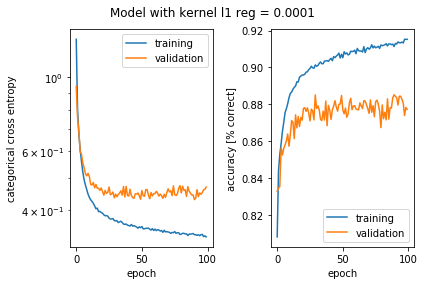

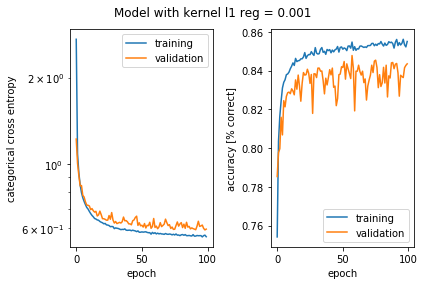

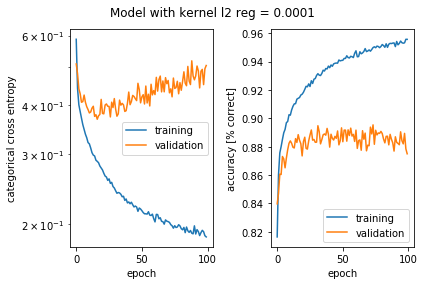

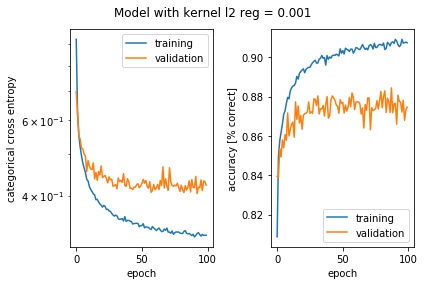

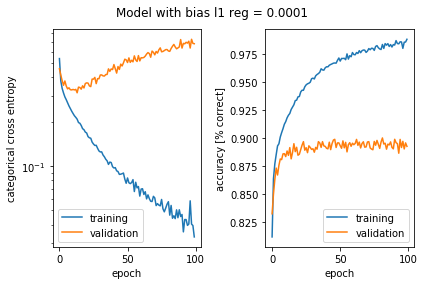

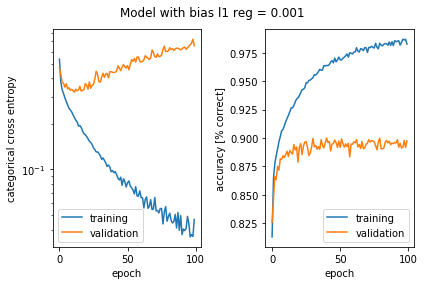

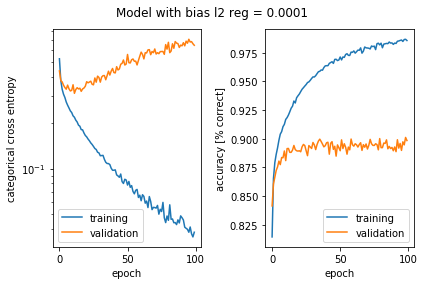

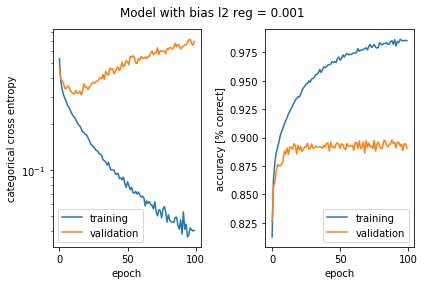

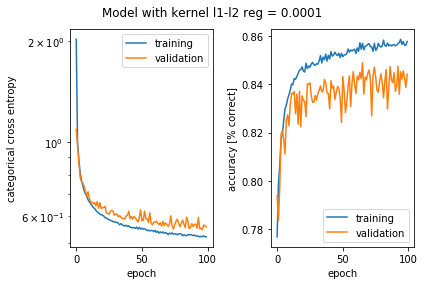

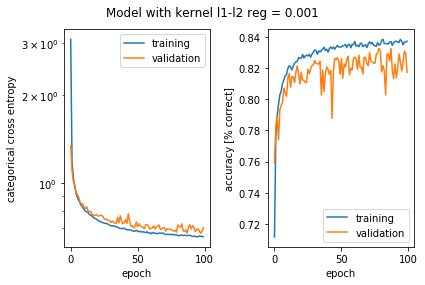

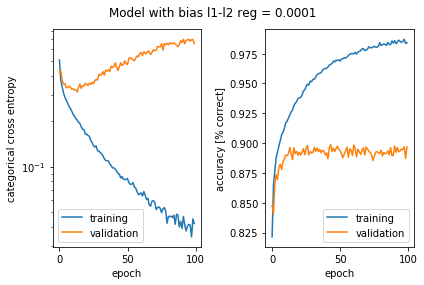

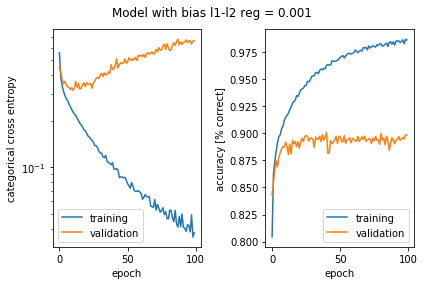

In [18]:
# Model with regularizers
regularizer_val = [0.0001, 0.001] 

# L1 on kernel
for i in regularizer_val:
    regularized_model("fashion", "Model with kernel l1 reg = " + str(i), [500, 50, 50], kernel_reg=regularizers.l1(i))
    
# L2 on kernel
for i in regularizer_val:
    regularized_model("fashion", "Model with kernel l2 reg = " + str(i), [500, 50, 50], kernel_reg=regularizers.l2(i))
    
# L1 on bias
for i in regularizer_val:
    regularized_model("fashion", "Model with bias l1 reg = " + str(i), [500, 50, 50], bias_reg=regularizers.l1(i))
    
# L2 on bias
for i in regularizer_val:
    regularized_model("fashion", "Model with bias l2 reg = " + str(i), [500, 50, 50], bias_reg=regularizers.l2(i))

# L1-L2 kernel
for i in regularizer_val:
    regularized_model("fashion", "Model with kernel l1-l2 reg = " + str(i), [500, 50, 50], kernel_reg=regularizers.l1_l2(i))

# L1-L2 bias
for i in regularizer_val:
    regularized_model("fashion", "Model with bias l1-l2 reg = " + str(i), [500, 50, 50], bias_reg=regularizers.l1_l2(i))

dropout = 0.2 and kernel l2 reg = 0.001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout_13 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 50)                25050     
_________________________________________________________________
dropout_14 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_15 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_90 (Dense)             (None, 

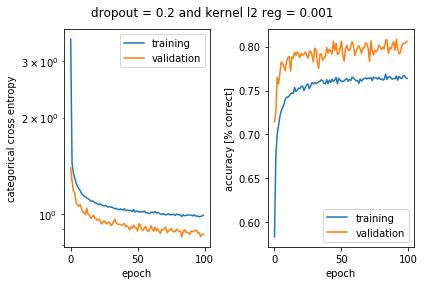

In [22]:
# According to the tests above, trying dropout = 0.3 and kernel l1l2 reg = 0.001
history_reg = regularized_model("fashion", "dropout = 0.2 and kernel l2 reg = 0.001", [500, 50, 50], dropout=0.3, kernel_reg=regularizers.l1_l2(0.001))

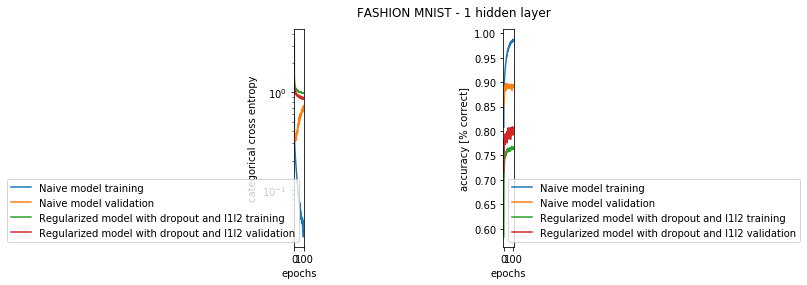

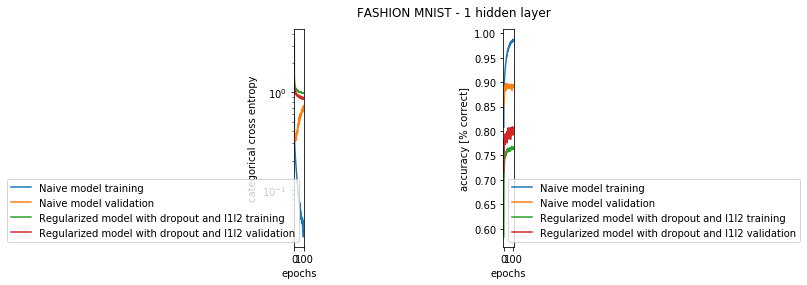

In [23]:
# Compare naive and regularized model
comparison_plot(history_naive, history_reg, "Naive model", "Regularized model with dropout and l1l2", "FASHION MNIST - 1 hidden layer")

### Fitting mnist with regularization

Naive model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_92 (Dense)             (None, 50)                25050     
_________________________________________________________________
dense_93 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_94 (Dense)             (None, 10)                510       
Total params: 420,610
Trainable params: 420,610
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 1s 58us/step
Validation loss =  0.12886735874368213
Validation accuracy =  0.9853


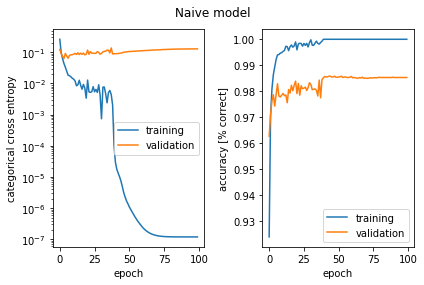

In [24]:
# Naive model
regularized_model("mnist", "Naive model", [500, 50, 50])

Model with batch normalization
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_4 (Batch (None, 500)               2000      
_________________________________________________________________
dense_96 (Dense)             (None, 50)                25050     
_________________________________________________________________
batch_normalization_5 (Batch (None, 50)                200       
_________________________________________________________________
dense_97 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_6 (Batch (None, 50)                200       
_________________________________________________________________
dense_98 (Dense)             (None, 10)      

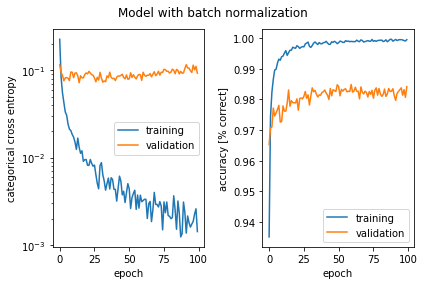

In [25]:
# Model with Batch normalization
regularized_model("mnist", "Model with batch normalization", [500, 50, 50], batch_norm=True)

Model with dropout = 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout_16 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 50)                25050     
_________________________________________________________________
dropout_17 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_101 (Dense)            (None, 50)                2550      
_________________________________________________________________
dropout_18 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_102 (Dense)            (None, 10)            

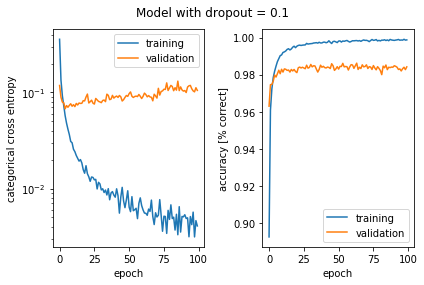

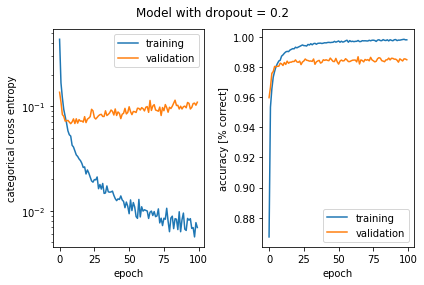

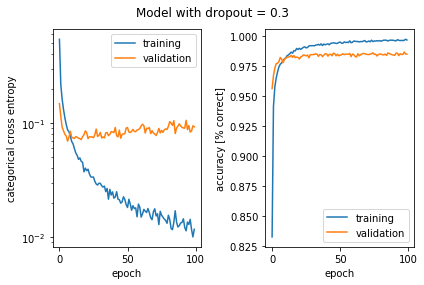

In [26]:
# Model with dropout
dropout_val = [0.1, 0.2, 0.3]

for i in dropout_val:
    regularized_model("mnist", "Model with dropout = " + str(i), [500, 50, 50], dropout=i)

dropout = 0.2 and kernel l2 reg = 0.001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 500)               392500    
_________________________________________________________________
dropout_25 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 50)                25050     
_________________________________________________________________
dropout_26 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_113 (Dense)            (None, 50)                2550      
_________________________________________________________________
dropout_27 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_114 (Dense)            (None, 

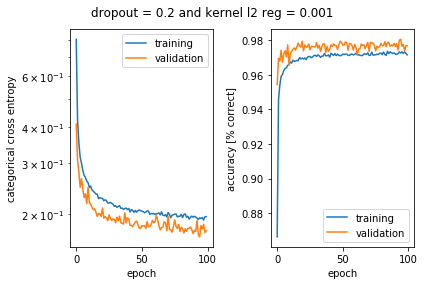

In [27]:
# Trying dropout = 0.2 and kernel l2 reg = 0.001
regularized_model("mnist", "dropout = 0.2 and kernel l2 reg = 0.001", [500, 50, 50], dropout=0.2, kernel_reg=regularizers.l2(0.001))

Answer to question 2 (comments):

## Exercise 6: Convolutional neural networks (CNNs) (10 points)

### Description

Convolutional neural networks have an inductive bias that is well adapted to image classification.

1. Design a convolutional neural network, play with different architectures and parameters. Hint: You may get valuable inspiration from the keras [examples](https://github.com/keras-team/keras/tree/master/examples). (4 pts)
2. Plot the learning curves of the convolutional neural network for MNIST and Fashion-MNIST. (4 pts)
3. How does the CNN performance compare to the so far best performing (deep) neural network model for the two data sets? (2 sentences max.) (2 pts)

### Solution

In [9]:
from keras.layers import Reshape

#### Mnist

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.2515 - acc: 0.9218 - val_loss: 0.0562 - val_acc: 0.9820
Epoch 2/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0852 - acc: 0.9741 - val_loss: 0.0379 - val_acc: 0.9878
Epoch 3/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.0649 - acc: 0.9807 - val_loss: 0.0324 - val_acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0525 - acc: 0.9840 - val_loss: 0.0313 - val_acc: 0.9896
Epoch 5/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.0469 - acc: 0.9858 - val_loss: 0.0288 - val_acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.0405 - acc: 0.9882 - val_loss: 0.0270 - val_acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0372 - acc: 0.9889 - val_loss: 0.

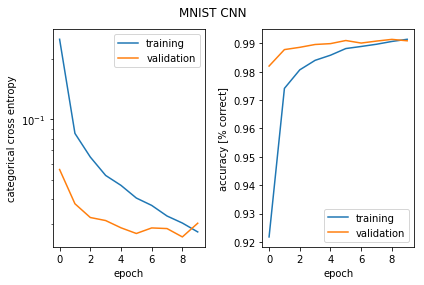

In [13]:
# Model from mnist_cnn on keras examples folder

model_mnist_cnn = Sequential()
model_mnist_cnn.add(Reshape((28, 28, 1), input_shape=(x_train.shape[1],)))
model_mnist_cnn.add(Conv2D(32, (3, 3), activation='relu'))
model_mnist_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_mnist_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_mnist_cnn.add(Dropout(0.25))
model_mnist_cnn.add(Flatten())
model_mnist_cnn.add(Dense(128, activation='relu'))
model_mnist_cnn.add(Dropout(0.5))
model_mnist_cnn.add(Dense(y_train.shape[1], activation='softmax'))

model_mnist_cnn.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])

history_mnist_cnn = model_mnist_cnn.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
plot_history(history_mnist_cnn, title = "MNIST CNN")
score = model_mnist_cnn.evaluate(x_test, y_test)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.3124 - acc: 0.9005 - val_loss: 0.0517 - val_acc: 0.9833
Epoch 2/10
60000/60000 [==============================] - 16s 264us/step - loss: 0.0964 - acc: 0.9711 - val_loss: 0.0349 - val_acc: 0.9889
Epoch 3/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.0690 - acc: 0.9799 - val_loss: 0.0307 - val_acc: 0.9903
Epoch 4/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0563 - acc: 0.9835 - val_loss: 0.0234 - val_acc: 0.9922
Epoch 5/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.0490 - acc: 0.9854 - val_loss: 0.0227 - val_acc: 0.9926
Epoch 6/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.0434 - acc: 0.9867 - val_loss: 0.0201 - val_acc: 0.9932
Epoch 7/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0397 - acc: 0.9882 - val_loss: 0.

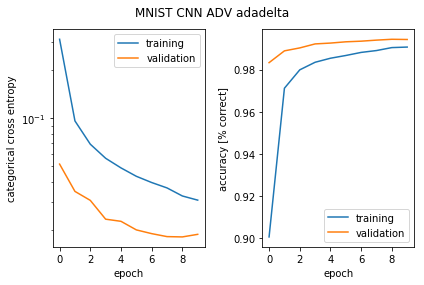

In [10]:
# Deeper structure with an additional CONV2D - CONV2D - MAXPOOL - DROPOUT

model_mnist_cnn_adv = Sequential()
model_mnist_cnn_adv.add(Reshape((28, 28, 1), input_shape=(x_train.shape[1],)))
model_mnist_cnn_adv.add(Conv2D(32, (3,3), activation ='relu'))
model_mnist_cnn_adv.add(Conv2D(64, (3,3), activation ='relu'))
model_mnist_cnn_adv.add(MaxPooling2D(pool_size=(2,2)))
model_mnist_cnn_adv.add(Dropout(0.25))
model_mnist_cnn_adv.add(Conv2D(32, (3,3), activation ='relu'))
model_mnist_cnn_adv.add(Conv2D(64, (3,3), activation ='relu'))
model_mnist_cnn_adv.add(MaxPooling2D(pool_size=(2,2)))
model_mnist_cnn_adv.add(Dropout(0.25))
model_mnist_cnn_adv.add(Flatten())
model_mnist_cnn_adv.add(Dense(128, activation = "relu"))
model_mnist_cnn_adv.add(Dropout(0.5))
model_mnist_cnn_adv.add(Dense(y_train.shape[1], activation = "softmax"))

# optimizer
model_mnist_cnn_adv.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])

history_mnist_cnn_adv = model_mnist_cnn_adv.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
plot_history(history_mnist_cnn_adv, title = "MNIST CNN ADV adadelta")
score = model_mnist_cnn_adv.evaluate(x_test, y_test)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.2758 - acc: 0.9132 - val_loss: 0.0478 - val_acc: 0.9852
Epoch 2/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.0846 - acc: 0.9751 - val_loss: 0.0333 - val_acc: 0.9894
Epoch 3/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0625 - acc: 0.9813 - val_loss: 0.0288 - val_acc: 0.9905
Epoch 4/10
60000/60000 [==============================] - 23s 382us/step - loss: 0.0506 - acc: 0.9851 - val_loss: 0.0237 - val_acc: 0.9930
Epoch 5/10
60000/60000 [==============================] - 22s 364us/step - loss: 0.0464 - acc: 0.9865 - val_loss: 0.0254 - val_acc: 0.9913
Epoch 6/10
60000/60000 [==============================] - 22s 370us/step - loss: 0.0409 - acc: 0.9881 - val_loss: 0.0221 - val_acc: 0.9933
Epoch 7/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.0375 - acc: 0.9891 - val_loss: 0.

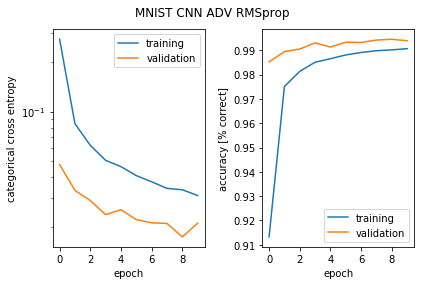

In [11]:
# Inspiration from https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
# Same as before but with different optimizer and parameters

model_mnist_cnn_adv = Sequential()
model_mnist_cnn_adv.add(Reshape((28, 28, 1), input_shape=(x_train.shape[1],)))
model_mnist_cnn_adv.add(Conv2D(32, (3,3), activation ='relu'))
model_mnist_cnn_adv.add(Conv2D(64, (3,3), activation ='relu'))
model_mnist_cnn_adv.add(MaxPooling2D(pool_size=(2,2)))
model_mnist_cnn_adv.add(Dropout(0.25))
model_mnist_cnn_adv.add(Conv2D(32, (3,3), activation ='relu'))
model_mnist_cnn_adv.add(Conv2D(64, (3,3), activation ='relu'))
model_mnist_cnn_adv.add(MaxPooling2D(pool_size=(2,2)))
model_mnist_cnn_adv.add(Dropout(0.25))
model_mnist_cnn_adv.add(Flatten())
model_mnist_cnn_adv.add(Dense(128, activation = "relu"))
model_mnist_cnn_adv.add(Dropout(0.5))
model_mnist_cnn_adv.add(Dense(y_train.shape[1], activation = "softmax"))

# optimizer
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_mnist_cnn_adv.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

history_mnist_cnn_adv = model_mnist_cnn_adv.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
plot_history(history_mnist_cnn_adv, title = "MNIST CNN ADV RMSprop")
score = model_mnist_cnn_adv.evaluate(x_test, y_test)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.1547 - acc: 0.9519 - val_loss: 0.0518 - val_acc: 0.9835
Epoch 2/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0509 - acc: 0.9845 - val_loss: 0.0528 - val_acc: 0.9825
Epoch 3/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.0381 - acc: 0.9877 - val_loss: 0.0215 - val_acc: 0.9933
Epoch 4/10
60000/60000 [==============================] - 21s 350us/step - loss: 0.0313 - acc: 0.9901 - val_loss: 0.0208 - val_acc: 0.9940
Epoch 5/10
60000/60000 [==============================] - 21s 348us/step - loss: 0.0273 - acc: 0.9914 - val_loss: 0.0162 - val_acc: 0.9950
Epoch 6/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.0232 - acc: 0.9925 - val_loss: 0.0198 - val_acc: 0.9941
Epoch 7/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.0213 - acc: 0.9930 - val_loss: 0.

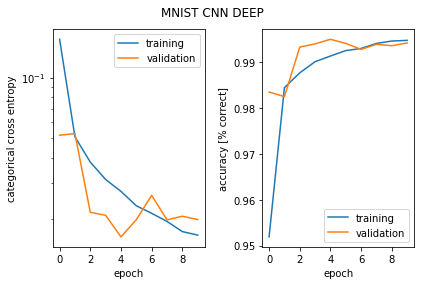

In [29]:
# Deeper structure, inspiration from https://www.kaggle.com/adityaecdrid/mnist-with-keras-for-beginners-99457

model_mnist_cnn_deep = Sequential()
model_mnist_cnn_deep.add(Reshape((28, 28, 1), input_shape=(x_train.shape[1],)))
model_mnist_cnn_deep.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model_mnist_cnn_deep.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model_mnist_cnn_deep.add(MaxPool2D((2, 2)))
model_mnist_cnn_deep.add(Dropout(0.2))
model_mnist_cnn_deep.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_mnist_cnn_deep.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_mnist_cnn_deep.add(MaxPool2D(pool_size=(2, 2)))
model_mnist_cnn_deep.add(Dropout(0.25))
model_mnist_cnn_deep.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_mnist_cnn_deep.add(Dropout(0.25))
model_mnist_cnn_deep.add(Flatten())
model_mnist_cnn_deep.add(Dense(128, activation='relu'))
model_mnist_cnn_deep.add(BatchNormalization())
model_mnist_cnn_deep.add(Dropout(0.25))
model_mnist_cnn_deep.add(Dense(y_train.shape[1], activation = "softmax"))

model_mnist_cnn_deep.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

history_mnist_cnn_deep = model_mnist_cnn_deep.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
plot_history(history_mnist_cnn_deep, title = "MNIST CNN DEEP")
score = model_mnist_cnn_deep.evaluate(x_test, y_test)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

#### Fashion mnist

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.5542 - acc: 0.8030 - val_loss: 0.3591 - val_acc: 0.8699
Epoch 2/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.3574 - acc: 0.8745 - val_loss: 0.3050 - val_acc: 0.8903
Epoch 3/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.3088 - acc: 0.8896 - val_loss: 0.2687 - val_acc: 0.9025
Epoch 4/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.2738 - acc: 0.9021 - val_loss: 0.2598 - val_acc: 0.9062
Epoch 5/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.2531 - acc: 0.9076 - val_loss: 0.2359 - val_acc: 0.9135
Epoch 6/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.2340 - acc: 0.9159 - val_loss: 0.2403 - val_acc: 0.9111
Epoch 7/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.2200 - acc: 0.9200 - val_loss: 0.

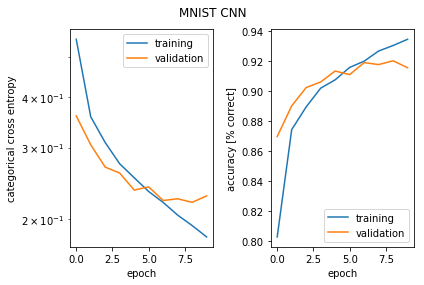

In [13]:
# Model from mnist_cnn on keras examples folder

model_fashion_cnn = Sequential()
model_fashion_cnn.add(Reshape((28, 28, 1), input_shape=(x_train.shape[1],)))
model_fashion_cnn.add(Conv2D(32, (3, 3), activation='relu'))
model_fashion_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_fashion_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_fashion_cnn.add(Dropout(0.25))
model_fashion_cnn.add(Flatten())
model_fashion_cnn.add(Dense(128, activation='relu'))
model_fashion_cnn.add(Dropout(0.5))
model_fashion_cnn.add(Dense(y_train.shape[1], activation='softmax'))

model_fashion_cnn.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])

history_fashion_cnn = model_fashion_cnn.fit(x_fashion_train, y_fashion_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_fashion_test, y_fashion_test))
plot_history(history_fashion_cnn, title = "MNIST CNN")
score = model_fashion_cnn.evaluate(x_fashion_test, y_fashion_test)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.6510 - acc: 0.7597 - val_loss: 0.4190 - val_acc: 0.8537
Epoch 2/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.4364 - acc: 0.8422 - val_loss: 0.3554 - val_acc: 0.8736
Epoch 3/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.3879 - acc: 0.8604 - val_loss: 0.3283 - val_acc: 0.8822
Epoch 4/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.3606 - acc: 0.8679 - val_loss: 0.3061 - val_acc: 0.8854
Epoch 5/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.3394 - acc: 0.8753 - val_loss: 0.2984 - val_acc: 0.8891
Epoch 6/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.3225 - acc: 0.8817 - val_loss: 0.2805 - val_acc: 0.8987
Epoch 7/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.3102 - acc: 0.8870 - val_loss: 0.

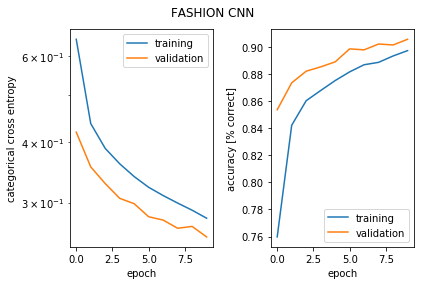

In [53]:
# Simple cnn model, https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a

model_fashion_cnn = Sequential()
model_fashion_cnn.add(Reshape((28, 28, 1), input_shape=(x_fashion_train.shape[1],)))
model_fashion_cnn.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model_fashion_cnn.add(MaxPooling2D(pool_size=2))
model_fashion_cnn.add(Dropout(0.3))
model_fashion_cnn.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_fashion_cnn.add(MaxPooling2D(pool_size=2))
model_fashion_cnn.add(Dropout(0.3))
model_fashion_cnn.add(Flatten())
model_fashion_cnn.add(Dense(256, activation='relu'))
model_fashion_cnn.add(Dropout(0.5))
model_fashion_cnn.add(Dense(y_fashion_train.shape[1], activation='softmax'))

model_fashion_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_fashion_cnn = model_fashion_cnn.fit(x_fashion_train, y_fashion_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_fashion_test, y_fashion_test))
plot_history(history_fashion_cnn, title = "FASHION CNN")
score = model_fashion_cnn.evaluate(x_fashion_test, y_fashion_test)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

10000/10000 [==============================] - 1s 94us/step
Validation loss: 0.26149632404446604
Validation accuracy: 0.9118


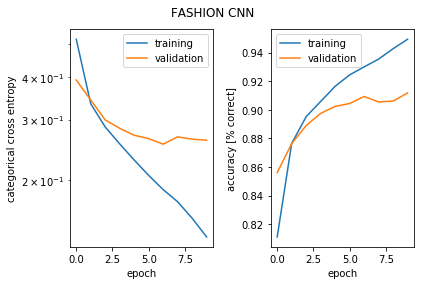

In [51]:
# Another simple model https://www.kaggle.com/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist

model_fashion_cnn = Sequential()
model_fashion_cnn.add(Reshape((28, 28, 1), input_shape=(x_fashion_train.shape[1],)))
model_fashion_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model_fashion_cnn.add(MaxPooling2D((2, 2)))
model_fashion_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_fashion_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_fashion_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_fashion_cnn.add(Flatten())
model_fashion_cnn.add(Dense(128, activation='relu'))
model_fashion_cnn.add(Dense(y_fashion_train.shape[1], activation='softmax'))

model_fashion_cnn.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

history_fashion_cnn = model_fashion_cnn.fit(x_fashion_train, y_fashion_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_fashion_test, y_fashion_test))
plot_history(history_fashion_cnn, title = "FASHION CNN")
score = model_fashion_cnn.evaluate(x_fashion_test, y_fashion_test)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Answer to question 3:

CNNs architectures clearly outperform the simple neural neutworks trained before in both metrics, validation loss and accuracy, and in both datasets. We register such a significant improvement because for image classification tasks these networks are the best-suited option due to the convolution operation which is able to capture adjacent pixel information.  

## Exercise 7: Sigmoidal activation function and batch-normalization (6 points)

### Description:

In the original publication of batch normalization [Ioffe and Szegedy, 2014](https://arxiv.org/pdf/1502.03167.pdf), the authors mention a particularly beneficial effect of their method on networks with sigmoidal activation functions. This is because such networks usually suffer from saturating activations/vanishing gradients. Here we want to reproduce this behaviour (Chose either MNIST or Fashion-MNIST for this exercise).

1. Implement the same convolutional network as in the previous exercise, but using the sigmoid activation function instead of the standard choice ReLU. Train the network for a reasonable amount of time. What do you observe? (1 sentence max.) (3 pts)
2. Add batch-normalization layers to all convolutional and fully-connected layers (i.e. before each layer with learnable parameters). How does the performance change? Can the network reach the ReLU-CNN performance of the previous exercise? (1 sentence max.) (3 pts)
3. **BONUS (optional, not graded**): Investigate our initial guess that saturating activity/vanishing gradients might be the cause of this behaviour. For that, create histograms of the hidden activitions for different hidden layers for the sigmoid-CNN and the sigmoid-CNN with batch-normalization (counting over both, samples and neurons per layer). You may only chose layers with learnable parameters. What do you observe?
Hint: You can use the [keract](https://github.com/philipperemy/keract) package to access neural activation values for all layers of your network model.



### Solution:

In [20]:
from keras.layers import BatchNormalization

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 315us/step - loss: 2.3089 - acc: 0.1092 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 19s 314us/step - loss: 2.3014 - acc: 0.1123 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 3/10
60000/60000 [==============================] - 23s 391us/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 4/10
60000/60000 [==============================] - 26s 427us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 5/10
60000/60000 [==============================] - 26s 432us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 6/10
60000/60000 [==============================] - 26s 439us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 7/10
60000/60000 [==============================] - 27s 455us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.

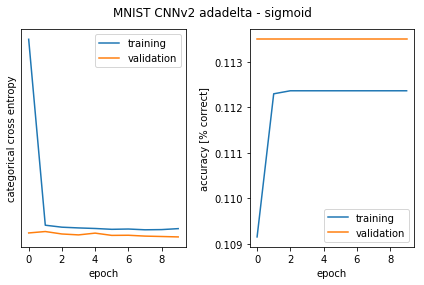

In [23]:
# Deeper structure with an additional CONV2D - CONV2D - MAXPOOL - DROPOUT and relu

model_mnist_cnn_sigm = Sequential()
model_mnist_cnn_sigm.add(Reshape((28, 28, 1), input_shape=(x_train.shape[1],)))
model_mnist_cnn_sigm.add(BatchNormalization())
model_mnist_cnn_sigm.add(Conv2D(32, (3,3), activation ='sigmoid'))
model_mnist_cnn_sigm.add(Conv2D(64, (3,3), activation ='sigmoid'))
model_mnist_cnn_sigm.add(MaxPooling2D(pool_size=(2,2)))
model_mnist_cnn_sigm.add(Dropout(0.25))
model_mnist_cnn_sigm.add(Conv2D(32, (3,3), activation ='sigmoid'))
model_mnist_cnn_sigm.add(Conv2D(64, (3,3), activation ='sigmoid'))
model_mnist_cnn_sigm.add(MaxPooling2D(pool_size=(2,2)))
model_mnist_cnn_sigm.add(Dropout(0.25))
model_mnist_cnn_sigm.add(Flatten())
model_mnist_cnn_sigm.add(Dense(128, activation = "sigmoid"))
model_mnist_cnn_sigm.add(Dropout(0.5))
model_mnist_cnn_sigm.add(Dense(y_train.shape[1], activation = "softmax"))

# optimizer
model_mnist_cnn_sigm.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])

history_mnist_cnn_sigm = model_mnist_cnn_sigm.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
plot_history(history_mnist_cnn_sigm, title = "MNIST CNNv2 adadelta - sigmoid")
score = model_mnist_cnn_sigm.evaluate(x_test, y_test)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 503us/step - loss: 0.4482 - acc: 0.8660 - val_loss: 0.0837 - val_acc: 0.9747
Epoch 2/10
60000/60000 [==============================] - 35s 586us/step - loss: 0.1214 - acc: 0.9657 - val_loss: 0.0449 - val_acc: 0.9857
Epoch 3/10
60000/60000 [==============================] - 33s 553us/step - loss: 0.0834 - acc: 0.9761 - val_loss: 0.0343 - val_acc: 0.9882
Epoch 4/10
60000/60000 [==============================] - 35s 582us/step - loss: 0.0681 - acc: 0.9803 - val_loss: 0.0312 - val_acc: 0.9901
Epoch 5/10
60000/60000 [==============================] - 35s 577us/step - loss: 0.0581 - acc: 0.9832 - val_loss: 0.0254 - val_acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 33s 543us/step - loss: 0.0500 - acc: 0.9852 - val_loss: 0.0246 - val_acc: 0.9913
Epoch 7/10
60000/60000 [==============================] - 33s 552us/step - loss: 0.0460 - acc: 0.9864 - val_loss: 0.

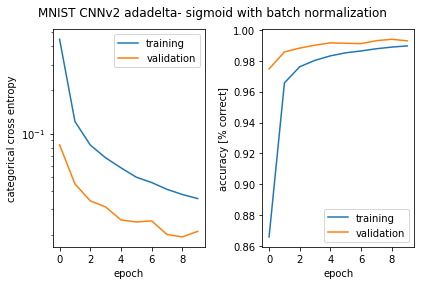

In [24]:
# Deeper structure with an additional CONV2D - CONV2D - MAXPOOL - DROPOUT and relu + batch normalization

model_mnist_cnn_sigm = Sequential()
model_mnist_cnn_sigm.add(Reshape((28, 28, 1), input_shape=(x_train.shape[1],)))
model_mnist_cnn_sigm.add(BatchNormalization())
model_mnist_cnn_sigm.add(Conv2D(32, (3,3), activation ='sigmoid'))
model_mnist_cnn_sigm.add(BatchNormalization())
model_mnist_cnn_sigm.add(Conv2D(64, (3,3), activation ='sigmoid'))
model_mnist_cnn_sigm.add(MaxPooling2D(pool_size=(2,2)))
model_mnist_cnn_sigm.add(Dropout(0.25))
model_mnist_cnn_sigm.add(BatchNormalization())
model_mnist_cnn_sigm.add(Conv2D(32, (3,3), activation ='sigmoid'))
model_mnist_cnn_sigm.add(BatchNormalization())
model_mnist_cnn_sigm.add(Conv2D(64, (3,3), activation ='sigmoid'))
model_mnist_cnn_sigm.add(MaxPooling2D(pool_size=(2,2)))
model_mnist_cnn_sigm.add(Dropout(0.25))
model_mnist_cnn_sigm.add(Flatten())
model_mnist_cnn_sigm.add(BatchNormalization())
model_mnist_cnn_sigm.add(Dense(128, activation = "sigmoid"))
model_mnist_cnn_sigm.add(Dropout(0.5))
model_mnist_cnn_sigm.add(Dense(y_train.shape[1], activation = "softmax"))

# optimizer
model_mnist_cnn_sigm.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])

history_mnist_cnn_sigm = model_mnist_cnn_sigm.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
plot_history(history_mnist_cnn_sigm, title = "MNIST CNNv2 adadelta- sigmoid with batch normalization")
score = model_mnist_cnn_sigm.evaluate(x_test, y_test)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Answer to question 1:

We observe very bad performance, probably complete overfitting of the network in all aspects.

Answer to question 2:

With the new settings, the network is now much more performant and we are able to almost reach the ReLU-CNN performance from the previous exercise.